<a href="https://colab.research.google.com/github/krishnasameera84/task6/blob/main/Boston_house_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Boston House Prices Datase**


**Price Prediction using Linear Regression**

Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.


**Lets get started**

First, we will import the required libraries

In [11]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we will load the housing data from the scikit-learn library and understand it.

In [12]:
from sklearn.datasets import load_boston

In [13]:
bt = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
bt.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [15]:
print(bt['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
print(bt['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [17]:
print(bt['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
boston_df = bt.data

In [19]:
boston_df

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
print(bt['filename'])

boston_house_prices.csv


In [21]:
bost = pd.DataFrame(data = bt.data, columns = bt.feature_names)

In [22]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# **Data Preprocessing**

In [23]:
bost.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
bost.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

**Data Visualization**

We will start by creating a scatterplot matrix that will allow us to visualize the pair-wise relationships and correlations between the different features.

It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

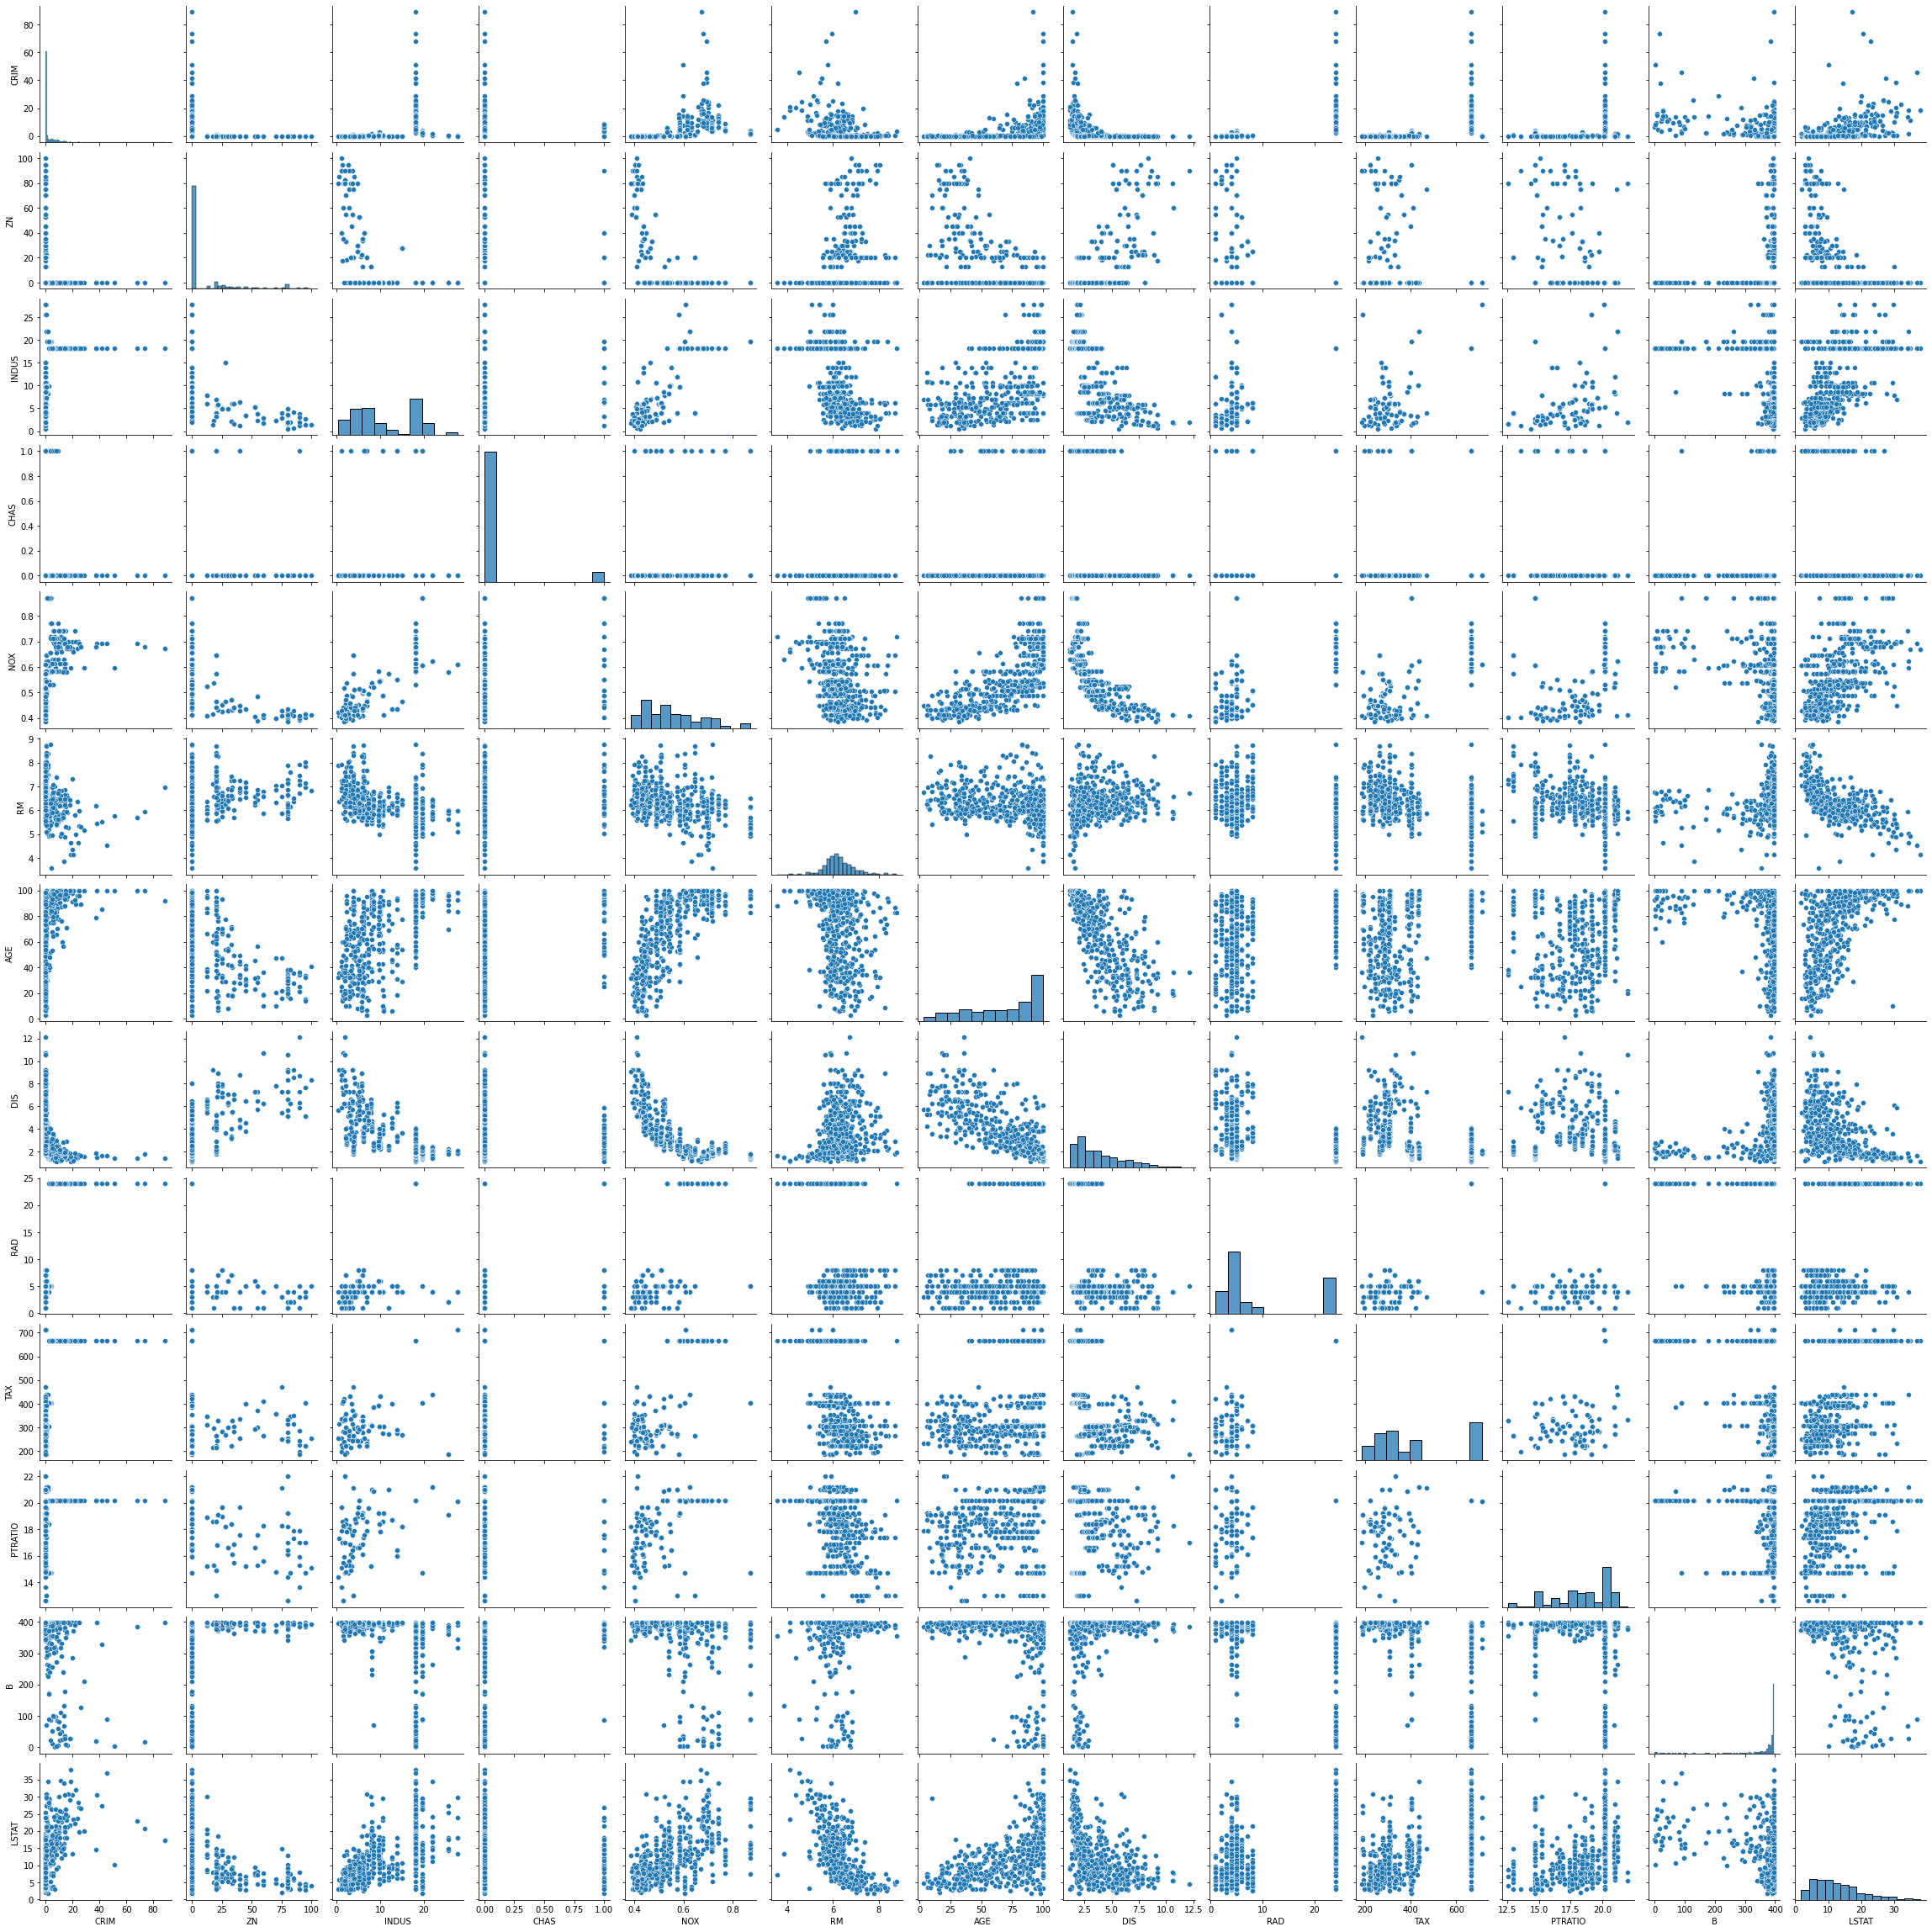

In [26]:
sns.pairplot(bost)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

IndexError: ignored

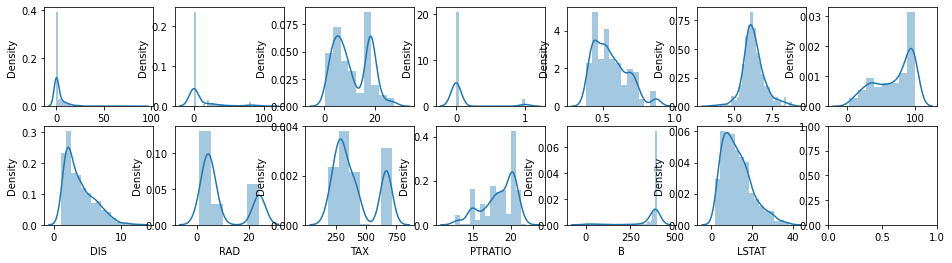

In [27]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows , ncols = cols , figsize = (16,4))

col = bost.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(bost[col[index]], ax = ax[i][j])
        index +=1 
plt.tight_layout()

We are going to create now a correlation matrix to quantify and summarize the relationships between the variables.

This correlation matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.

It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

In [28]:
corrdat = bost.corr()
corrdat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


We will use the heatmap function from the seaborn library to plot the correlation matrix.

<AxesSubplot:>

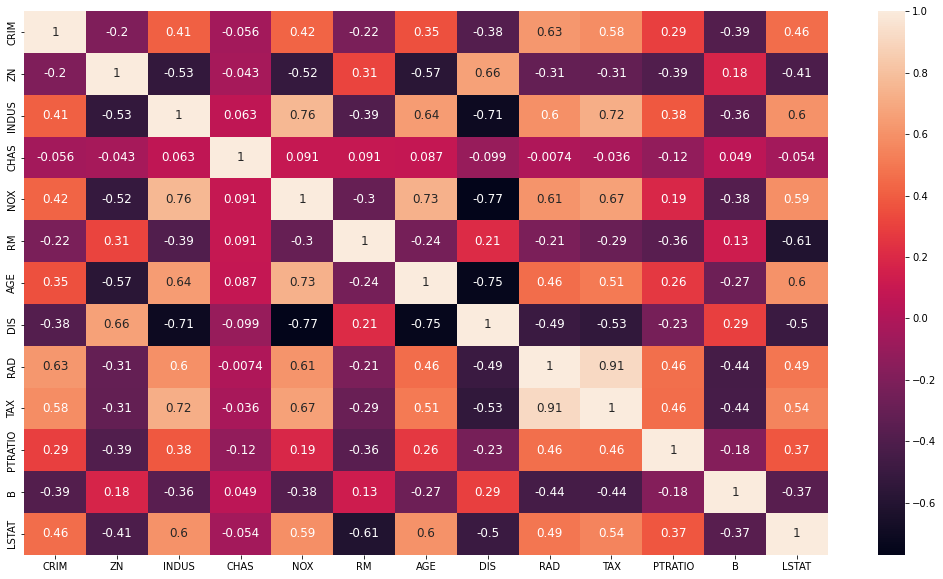

In [29]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

In [30]:
corrdat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

To fit a linear regression model, we select those features which have a high correlation with our target variable Price. Below getCorrelatedFeature function is used to find those features by comparing their absolute value of correlated features with threshold.

In [31]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

In [33]:
threshold = 0.4
corr_value = getCorrelatedFeature(corrdat['LSTAT'],threshold)

CRIM
ZN
INDUS
NOX
RM
AGE
DIS
RAD
TAX
LSTAT


In [34]:
corr_value

,corr value
CRIM,0.455621
ZN,-0.412995
INDUS,0.603800
NOX,0.590879
RM,-0.613808
AGE,0.602339
DIS,-0.496996
RAD,0.488676
TAX,0.543993
LSTAT,1.000000


In [35]:
CD = bost[corr_value.index]
CD.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,5.33


# **Pairplot and Corrmat of correlated data**

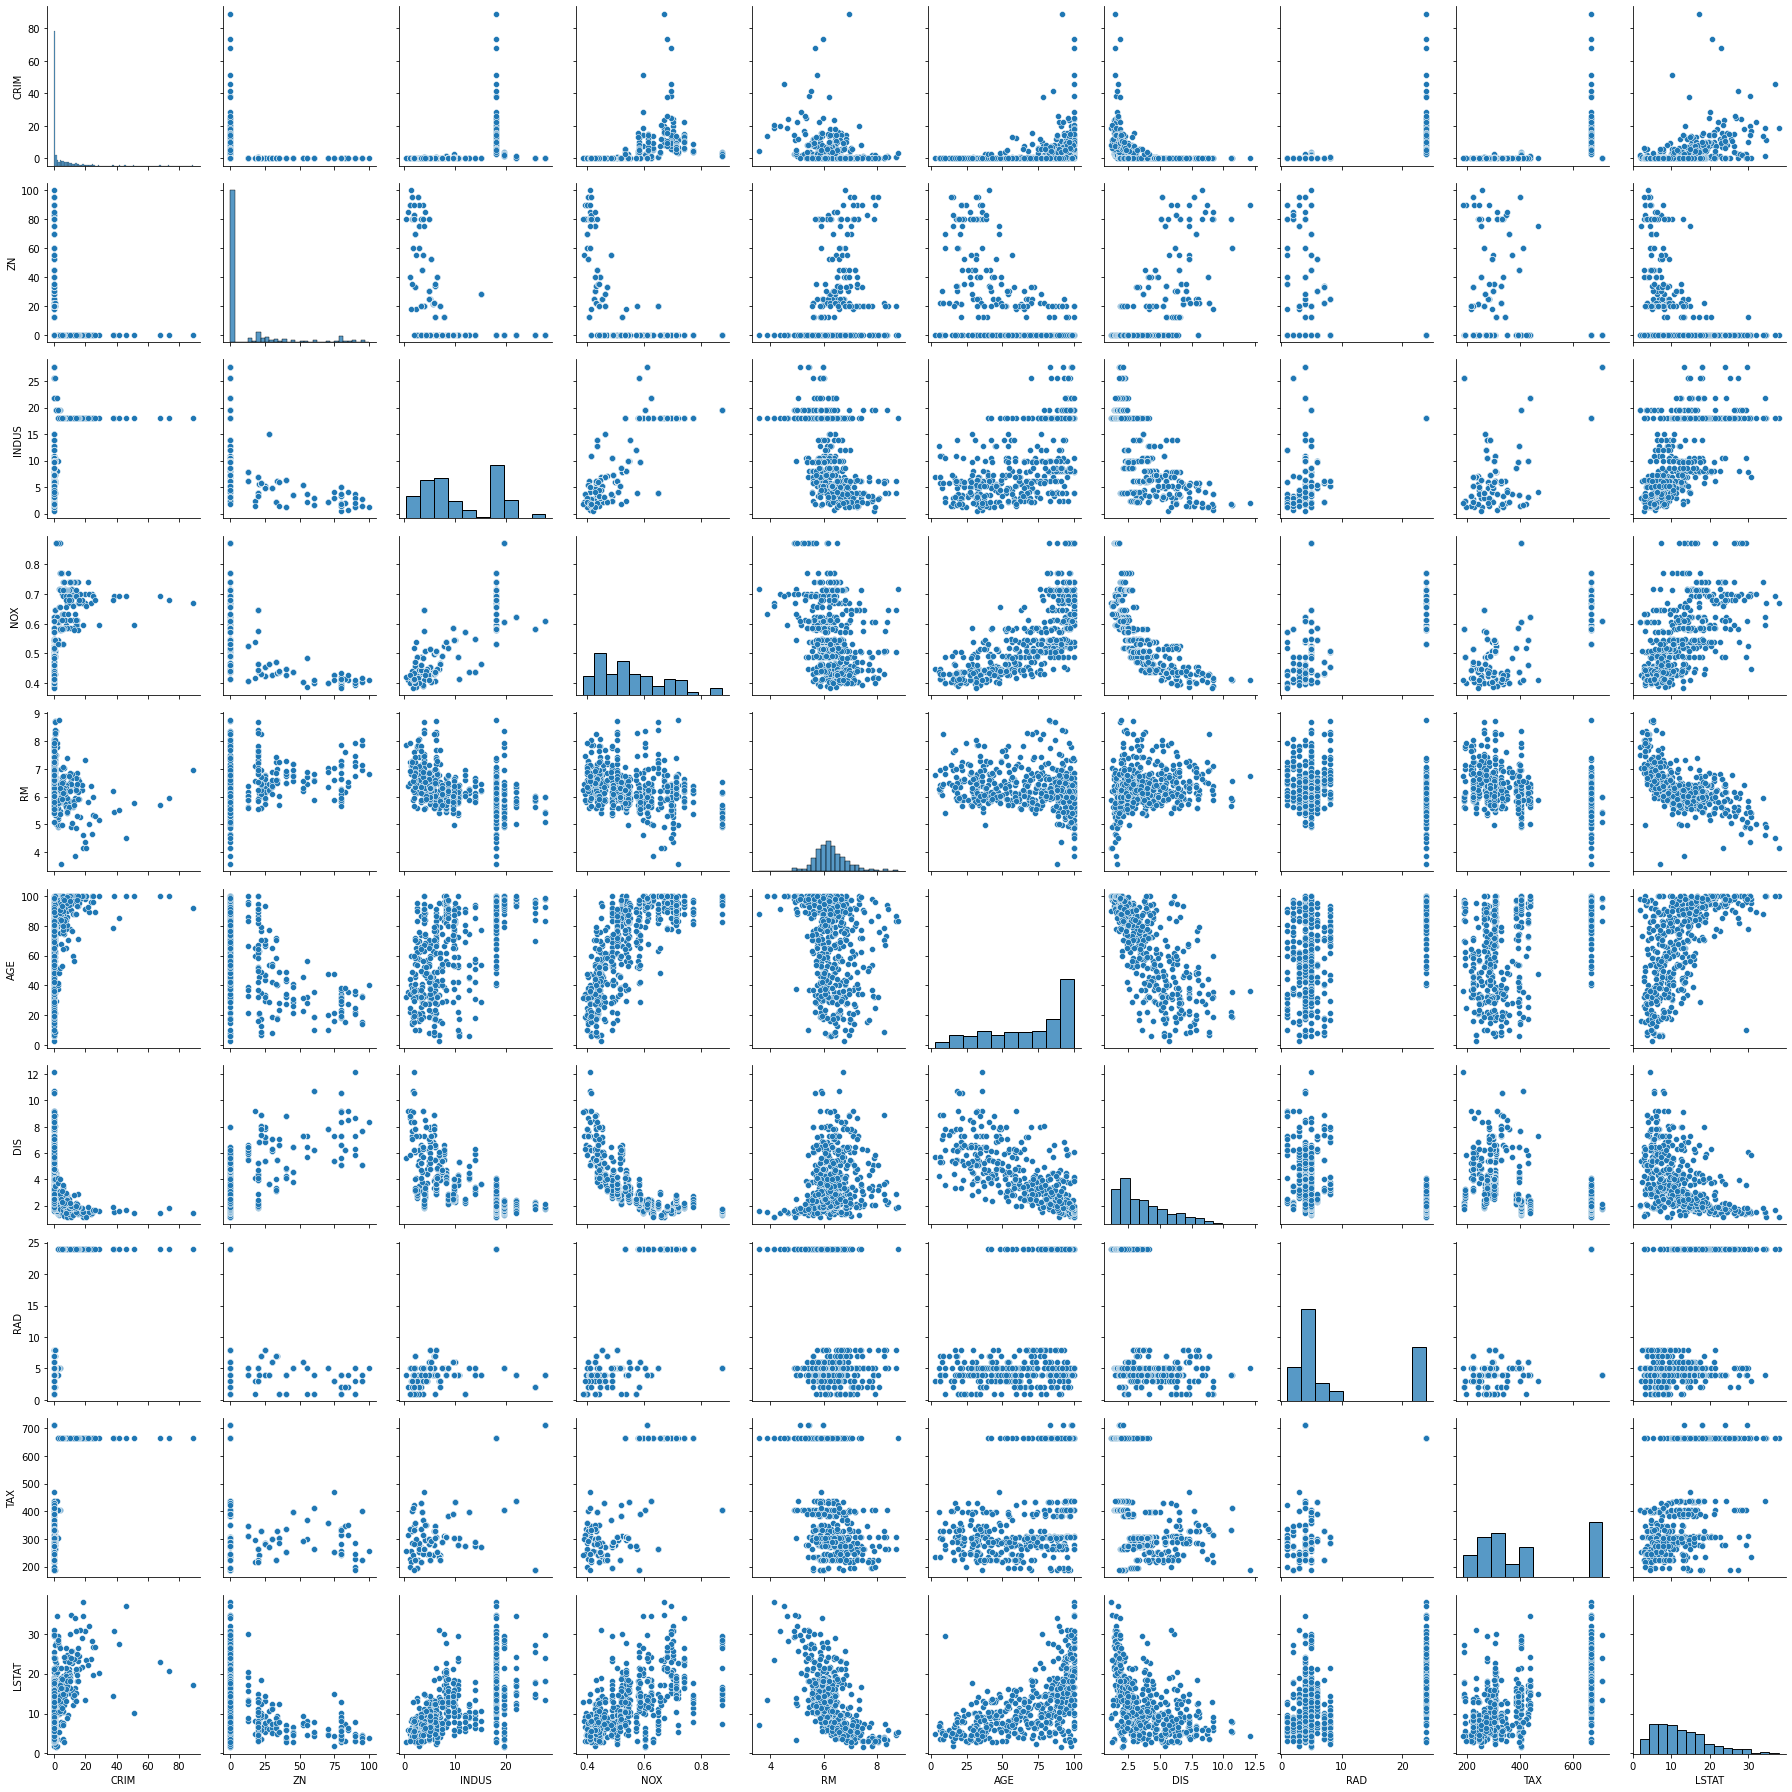

In [36]:
sns.pairplot(CD)
plt.tight_layout()

<AxesSubplot:>

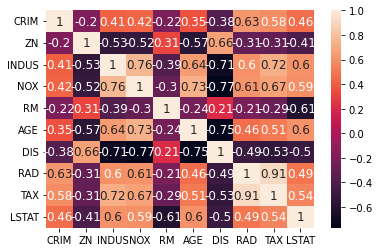

In [37]:
sns.heatmap(CD.corr(),annot =True , annot_kws=  {'size':12})

# spliting the data

we will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [40]:
X = CD.drop(labels = ['CRIM'], axis = 1)
y = CD['CRIM']

In [41]:
X.head()

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,LSTAT
0,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,4.98
1,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,9.14
2,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,4.03
3,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,2.94
4,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,5.33


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

In [44]:
X_train.shape , X_test.shape

((354, 9), (152, 9))

**Lets Start Train the Model**

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train , y_train)

LinearRegression()

In [48]:
predict = model.predict(X_test)

In [49]:
predict

array([-6.11164427e-01,  9.77816896e+00, -2.60289816e-01,  1.24423849e+01,
        3.73870094e-01, -1.28844334e+00,  9.98319863e+00, -2.61988761e-01,
        1.30741468e+00,  9.04046558e-01,  1.28794142e+01,  1.38752851e+01,
        1.16570530e+01,  1.51913829e+01, -2.73804144e+00,  3.45630897e-01,
        9.70148806e+00, -1.03462700e+00,  2.23297980e-01,  3.62171253e-01,
       -6.71159820e-01, -1.57493424e-01,  2.40154198e+00,  1.06033500e+00,
       -7.55428506e-01,  1.00155634e+01,  3.87593077e-01,  4.32877217e-01,
       -1.76936857e+00,  3.21922460e+00,  1.21535860e+01,  1.03792401e+01,
       -3.81228057e-01,  1.59750885e+00,  9.28795081e-01,  1.04851986e+01,
        1.50969474e+01,  9.47390519e+00,  1.24637191e+01,  1.43335165e+01,
       -1.26441690e+00,  6.50138221e-01, -7.71395796e-01,  1.18954635e+01,
       -3.21310887e+00, -2.16434447e+00, -9.57916585e-02,  3.09064911e-01,
        5.00218119e+00,  6.51655365e-01,  5.10412133e-01,  4.08174554e+00,
        2.65770374e+00, -

In [50]:
compare1 = pd.DataFrame({"Predicted":predict , "Actual": y_test})

In [51]:
compare1

,Predicted,Actual
329,-0.611164,0.06724
371,9.778169,9.23230
219,-0.260290,0.11425
403,12.442385,24.80170
78,0.373870,0.05646
...,...,...
4,-2.513008,0.06905
428,13.552636,7.36711
385,16.348352,16.81180
308,-2.181272,0.49298


In [52]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [53]:
score = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

In [54]:
print("The performance for testing set")
print("-------------------------------")
print('r2_score is', score)
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)

The performance for testing set
-------------------------------
r2_score is 0.4538698006406642
MAE is  2.8079856897829454
MSE is  45.47037642834113
RMSE is  6.743172578863835
